In [12]:
import numpy as np
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_classif, RFE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
pd.options.display.max_columns = None
import joblib
from itertools import chain
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.metrics import log_loss
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.metrics import (
    roc_curve, auc, classification_report, 
    matthews_corrcoef, accuracy_score, confusion_matrix
)
from sklearn.svm import SVC
from lightgbm import LGBMClassifier
import seaborn as sns
from scipy.stats import shapiro, anderson, kstest
from sklearn.model_selection import GridSearchCV

In [13]:
df = pd.read_csv('data/data.csv', low_memory=False)

In [14]:
max_vals = df.select_dtypes(include='number').max()
max_9 = max_vals[max_vals == 9].index.tolist()
for col in max_9:
    df.loc[df[col] == 9, col] = np.nan 
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

missing_subset = {'ALCFREQ', 'HATTMULT', 'STROKMUL', 'TIAMULT', 'ARTHTYPE', 'ARTHUPEX', 'ARTHLOEX', 'ARTHSPIN', 'ARTHUNK', 'CVDCOG', 'STROKCOG', 'CVDIMAG', 'CVDIMAG1', 'CVDIMAG2', 'CVDIMAG3', 'CVDIMAG4', 'PDNORMAL', 'SPEECH', 'FACEXP', 'TRESTRHD', 'TRESTLHD', 'TRESTRFT', 'TRESTLFT', 'TRACTRHD', 'TRACTLHD', 'RIGDNECK', 'RIGDUPRT', 'RIGDUPLF', 'RIGDLORT', 'RIGDLOLF', 'TAPSRT', 'TAPSLF', 'HANDMOVR', 'HANDMOVL', 'HANDALTR', 'HANDALTL', 'LEGRT', 'LEGLF', 'ARISING', 'POSTURE', 'GAIT', 'POSSTAB', 'BRADYKIN', 'RESTTRL', 'RESTTRR', 'SLOWINGL', 'SLOWINGR', 'RIGIDL', 'RIGIDR', 'BRADY', 'POSTINST', 'CORTDEF', 'SIVDFIND', 'CVDMOTL', 'CVDMOTR', 'CORTVISL', 'CORTVISR', 'SOMATL', 'SOMATR', 'EYEPSP', 'DYSPSP', 'AXIALPSP', 'GAITPSP', 'APRAXSP', 'APRAXL', 'APRAXR', 'CORTSENL', 'CORTSENR', 'ATAXL', 'ATAXR', 'ALIENLML', 'ALIENLMR', 'DYSTONL', 'DYSTONR', 'MYOCLLT', 'MYOCLRT', 'MOMOPARK', 'MOMOALS', 'AMNDEM', 'PCA', 'NAMNDEM', 'AMYLPET', 'AMYLCSF', 'FDGAD', 'HIPPATR', 'TAUPETAD', 'CSFTAU', 'FDGFTLD', 'TPETFTLD', 'MRFTLD', 'DATSCAN', 'IMAGLINF', 'IMAGLAC', 'IMAGMACH', 'IMAGMICH', 'IMAGMWMH', 'IMAGEWMH', 'CANCER', 'MYOINF', 'CONGHRT', 'AFIBRILL', 'HYPERT', 'ANGINA', 'HYPCHOL', 'VB12DEF', 'THYDIS', 'ARTH', 'ARTYPE', 'ARTUPEX', 'ARTLOEX', 'ARTSPIN', 'ARTUNKN', 'URINEINC', 'BOWLINC', 'SLEEPAP', 'REMDIS', 'HYPOSOM', 'SLEEPOTH', 'ANGIOCP', 'ANGIOPCI', 'PACEMAKE', 'HVALVE', 'ANTIENC'}
cols_to_change = list(missing_subset.intersection(max_8))
df[cols_to_change] = df[cols_to_change].replace(8, np.nan)
max_vals = df.select_dtypes(include='number').max()
max_8 = max_vals[max_vals == 8].index.tolist()

df = df.drop(columns=['NPWBRF', 'NACCBRNN', 'NPGRCCA', 'NPGRLA', 'NPGRHA', 'NPGRSNH', 'NPGRLCH', 'NACCAVAS', 'NPTAN', 'NPABAN', 'NPASAN', 'NPTDPAN', 'NPTHAL', 'NACCBRAA', 'NACCNEUR', 'NPADNC', 'NACCDIFF', 'NACCAMY', 'NPINF', 'NACCINF', 'NPHEMO', 'NPHEMO1', 'NPHEMO2', 'NPHEMO3', 'NPOLD', 'NPOLD1', 'NPOLD2', 'NPOLD3', 'NPOLD4', 'NACCMICR', 'NPOLDD', 'NPOLDD1', 'NPOLDD2', 'NPOLDD3', 'NPOLDD4', 'NACCHEM', 'NACCARTE', 'NPWMR', 'NPPATH', 'NACCNEC', 'NPPATH2', 'NPPATH3', 'NPPATH4', 'NPPATH5', 'NPPATH6', 'NPPATH7', 'NPPATH8', 'NPPATH9', 'NPPATH10', 'NPPATH11', 'NACCLEWY', 'NPLBOD', 'NPNLOSS', 'NPHIPSCL', 'NPFTDTAU', 'NACCPICK', 'NPFTDT2', 'NACCCBD', 'NACCPROG', 'NPFTDT5', 'NPFTDT6', 'NPFTDT7', 'NPFTDT8', 'NPFTDT9', 'NPFTDT10', 'NPFTDTDP', 'NPALSMND', 'NPOFTD', 'NPOFTD1', 'NPOFTD2', 'NPOFTD3', 'NPOFTD4', 'NPOFTD5', 'NPTDPA', 'NPTDPB', 'NPTDPC', 'NPTDPD', 'NPTDPE', 'NPPDXA', 'NPPDXB', 'NACCPRIO', 'NPPDXD', 'NPPDXE', 'NPPDXF', 'NPPDXG', 'NPPDXH', 'NPPDXI', 'NPPDXJ', 'NPPDXK', 'NPPDXL', 'NPPDXM', 'NPPDXN', 'NPPDXP', 'NPPDXQ', 'NPARTAG', 'NPATGSEV', 'NPATGAMY', 'NPATGAM1', 'NPATGAM2', 'NPATGAM3', 'NPATGAM4', 'NPATGAM5', 'NPATGFRN', 'NPATGFR1', 'NPATGFR2', 'NPATGFR3', 'NPATGFR4'])

initial = df.shape[1]
threshold = 0.8 * len(df)
df = df.dropna(thresh=threshold, axis=1)
remaining = df.shape[1]
dropped = initial - remaining

print(f"initial: {initial}")
print(f"remaining: {remaining}")
print(f"dropped: {dropped}")

initial: 862
remaining: 213
dropped: 649


In [15]:
impairment_vars = ['BILLS', 'SHOPPING', 'STOVE', 'TRAVEL']

functional_impairment = df[impairment_vars].sum(axis=1, skipna=True)

df = pd.concat([df, functional_impairment.rename('FUNCTIONAL_IMPAIRMENT')], axis=1)
df.drop(columns=impairment_vars, inplace=True)

df = df.copy()

In [16]:
conditions = [
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] < 4) & (df["OUTCOME_EVENTMCI"] == True),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == False),
    (df["TIME"] >= 4) & (df["OUTCOME_EVENTMCI"] == True)
]
values = [np.nan, True, False, False]

df["OUTCOME_WITHIN_4_YEARS"] = np.select(conditions, values, default=np.nan)
df = df.dropna(subset=["OUTCOME_WITHIN_4_YEARS"])

In [17]:
df = df.drop(columns=['TIME', 'OUTCOME_EVENTMCI'])
X = df.drop(columns=['OUTCOME_WITHIN_4_YEARS'])
y = df['OUTCOME_WITHIN_4_YEARS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [18]:
class HandleOutliers(BaseEstimator, TransformerMixin):
    def __init__(self, lower_quantile=0.3, upper_quantile=0.7):
        self.lower_quantile = lower_quantile
        self.upper_quantile = upper_quantile

    def fit(self, X, y=None):
        X = pd.DataFrame(X)
        self.quantile_bounds_ = {}
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns
        
        for col in numeric_columns:
            Q1 = X[col].quantile(self.lower_quantile)
            Q2 = X[col].quantile(self.upper_quantile)
            IQR = Q2 - Q1
            self.quantile_bounds_[col] = {
                'lower_bound': Q1 - 1.5 * IQR,
                'upper_bound': Q2 + 1.5 * IQR
            }
        return self

    def transform(self, X):
        X = pd.DataFrame(X).copy()
        numeric_columns = X.select_dtypes(include=['int64', 'float64']).columns

        for col in numeric_columns:
            if col not in self.quantile_bounds_:
                continue  
            bounds = self.quantile_bounds_[col]
            mean_value = X[col].mean()
            
            X[col] = np.where(X[col] < bounds['lower_bound'], mean_value, 
                              np.where(X[col] > bounds['upper_bound'], mean_value, X[col]))
        return X.values

In [10]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

logreg_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LogisticRegression(max_iter=200, C=1, penalty='l2', solver='liblinear'))
])

logreg_pipeline.fit(X_train, y_train)

train_score = logreg_pipeline.score(X_train, y_train)
test_predictions = logreg_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

train_score, test_accuracy

(0.8529256023298915, 0.8570672313393329)

In [21]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

svm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', SVC(C=100, gamma='auto', kernel='linear'))
])

svm_pipeline.fit(X_train, y_train)

train_score = svm_pipeline.score(X_train, y_train)
test_predictions = svm_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

train_score, test_accuracy

(0.8521313211543553, 0.8581259925886713)

In [19]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2, n_estimators=200))
])

rf_pipeline.fit(X_train, y_train)

train_score = rf_pipeline.score(X_train, y_train)
test_predictions = rf_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

train_score, test_accuracy

(0.8802621127879269, 0.8549497088406565)

In [20]:
num_cols = X.select_dtypes(['number']).columns
cat_cols = X.select_dtypes(['object']).columns

num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')), 
    ('outlier', HandleOutliers(lower_quantile=0.3, upper_quantile=0.7)),
    ('scaler', StandardScaler())
])

cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
])

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

var_thresh = VarianceThreshold(threshold=0.1)
select_k = SelectKBest(score_func=f_classif, k=50)
log_reg = LogisticRegression(max_iter=1000, solver='liblinear')
rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=20)

lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('variance_threshold', var_thresh),
    ('select_k_best', select_k),
    ('rfe', rfe),
    ('classifier', LGBMClassifier(colsample_bytree=0.8, learning_rate=0.01, max_depth=20, min_child_samples=20, n_estimators=100, num_leaves=31, subsample=0.8))
])

lgbm_pipeline.fit(X_train, y_train)

train_score = lgbm_pipeline.score(X_train, y_train)
test_predictions = lgbm_pipeline.predict(X_test)
test_accuracy = accuracy_score(y_test, test_predictions)

train_score, test_accuracy

[LightGBM] [Info] Number of positive: 4615, number of negative: 10493
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001460 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 260
[LightGBM] [Info] Number of data points in the train set: 15108, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.305467 -> initscore=-0.821397
[LightGBM] [Info] Start training from score -0.821397


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


(0.857625099285147, 0.8528321863419799)


Results for Pipeline


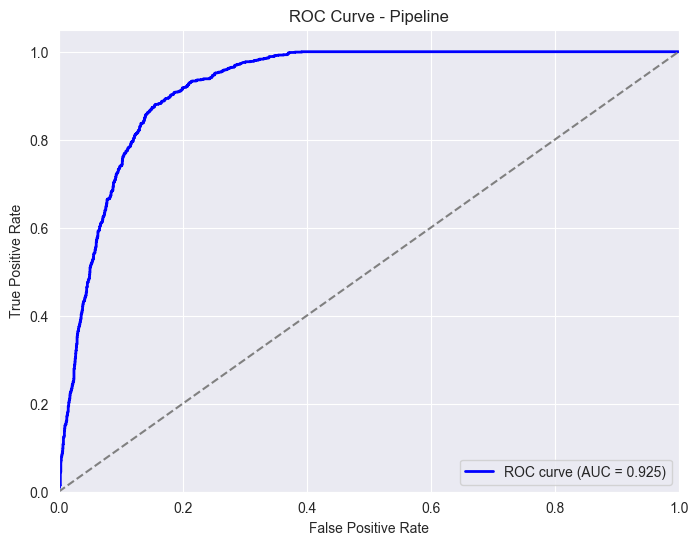

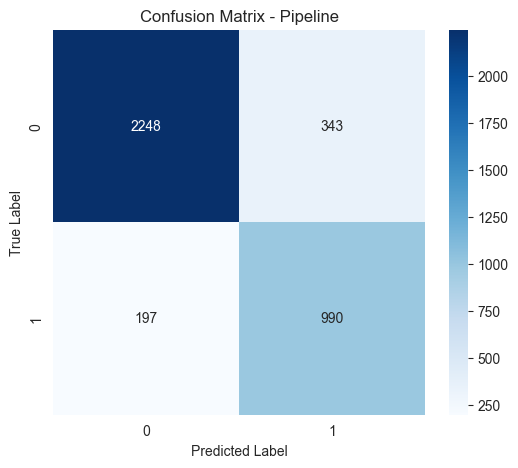

ROC AUC Score: 0.925
Matthews Correlation Coefficient: 0.682
Accuracy Score: 0.857
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      2591
         1.0       0.74      0.83      0.79      1187

    accuracy                           0.86      3778
   macro avg       0.83      0.85      0.84      3778
weighted avg       0.86      0.86      0.86      3778


Results for Pipeline


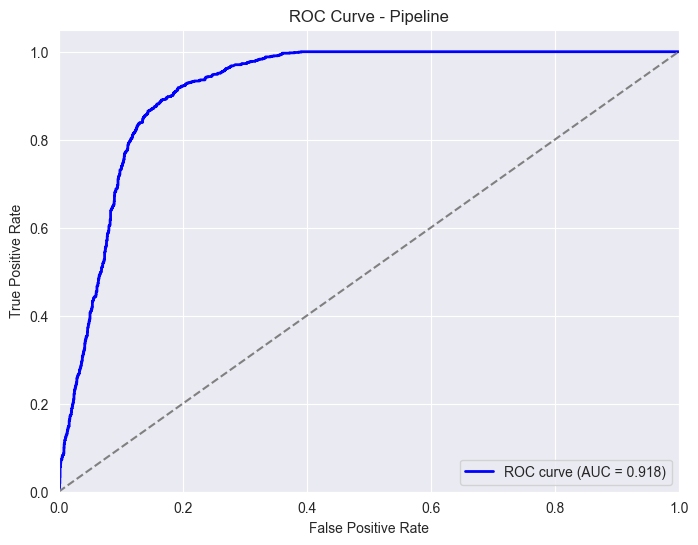

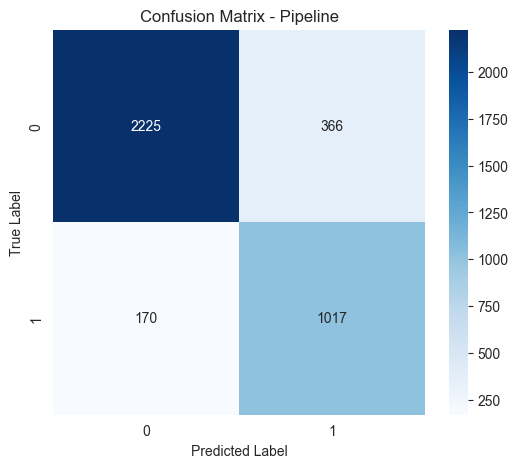

ROC AUC Score: 0.918
Matthews Correlation Coefficient: 0.689
Accuracy Score: 0.858
Classification Report:
               precision    recall  f1-score   support

         0.0       0.93      0.86      0.89      2591
         1.0       0.74      0.86      0.79      1187

    accuracy                           0.86      3778
   macro avg       0.83      0.86      0.84      3778
weighted avg       0.87      0.86      0.86      3778


Results for Pipeline


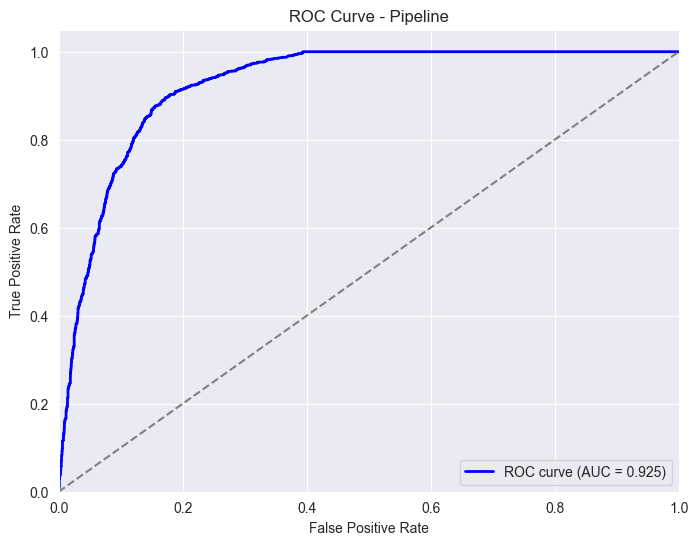

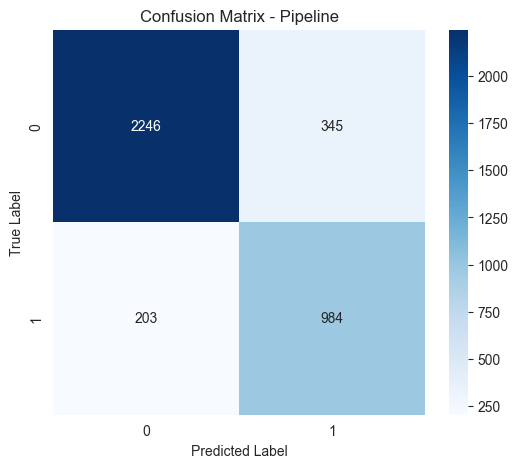

ROC AUC Score: 0.925
Matthews Correlation Coefficient: 0.676
Accuracy Score: 0.855
Classification Report:
               precision    recall  f1-score   support

         0.0       0.92      0.87      0.89      2591
         1.0       0.74      0.83      0.78      1187

    accuracy                           0.85      3778
   macro avg       0.83      0.85      0.84      3778
weighted avg       0.86      0.85      0.86      3778


Results for Pipeline


C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
C:\Bakalarka\venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


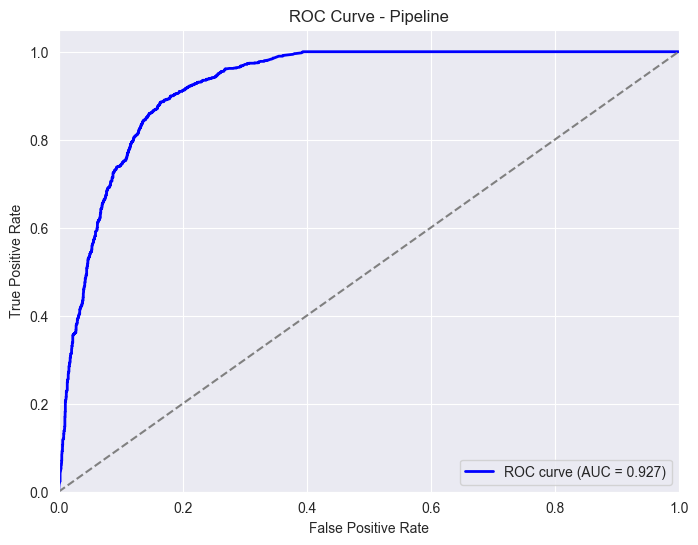

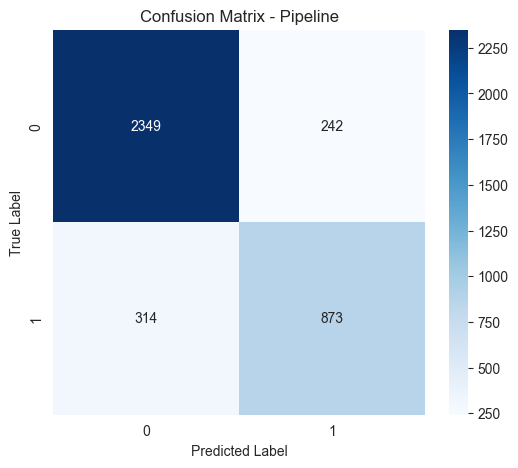

ROC AUC Score: 0.927
Matthews Correlation Coefficient: 0.653
Accuracy Score: 0.853
Classification Report:
               precision    recall  f1-score   support

         0.0       0.88      0.91      0.89      2591
         1.0       0.78      0.74      0.76      1187

    accuracy                           0.85      3778
   macro avg       0.83      0.82      0.83      3778
weighted avg       0.85      0.85      0.85      3778


In [23]:
pipelines = [logreg_pipeline, svm_pipeline, rf_pipeline, lgbm_pipeline]

for pipeline in pipelines:
    print(f"\nResults for {pipeline.__class__.__name__}")  
    
    try:
        y_prob = pipeline.predict_proba(X_test)[:, 1]
    except AttributeError:
        y_prob = pipeline.decision_function(X_test)    
    
    y_pred = pipeline.predict(X_test) 
    
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    
    class_report = classification_report(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color="blue", lw=2, label=f"ROC curve (AUC = {roc_auc:.3f})")
    plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {pipeline.__class__.__name__}")
    plt.legend(loc="lower right")
    plt.show()
    
    plt.figure(figsize=(6, 5))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {pipeline.__class__.__name__}")
    plt.show()

    print(f"ROC AUC Score: {roc_auc:.3f}")
    print(f"Matthews Correlation Coefficient: {mcc:.3f}")
    print(f"Accuracy Score: {accuracy:.3f}")
    print("Classification Report:\n", class_report)